In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = './36100412-eng/36100412.csv'
df = pd.read_csv(data)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3014 entries, 0 to 3013
Data columns (total 17 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   REF_DATE                                    3014 non-null   object 
 1   GEO                                         3014 non-null   object 
 2   DGUID                                       3014 non-null   object 
 3   Canada's international investment position  3014 non-null   object 
 4   Geographic region                           3014 non-null   object 
 5   Currency                                    3014 non-null   object 
 6   UOM                                         3014 non-null   object 
 7   UOM_ID                                      3014 non-null   int64  
 8   SCALAR_FACTOR                               3014 non-null   object 
 9   SCALAR_ID                                   3014 non-null   int64  
 10  VECTOR      

In [3]:
df.loc[~df.STATUS.isnull()][:]

,REF_DATE,GEO,DGUID,Canada's international investment position,Geographic region,Currency,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
29,2015-01,Canada,2016A000011124,"Canadian portfolio investment, foreign equity ...",All countries,Canadian dollar,Dollars,81,millions,6,v115115405,1.5.1.2,NaN,..,NaN,NaN,0
173,2015-04,Canada,2016A000011124,"Canadian portfolio investment, foreign equity ...",All countries,Canadian dollar,Dollars,81,millions,6,v115115405,1.5.1.2,NaN,..,NaN,NaN,0
317,2015-07,Canada,2016A000011124,"Canadian portfolio investment, foreign equity ...",All countries,Canadian dollar,Dollars,81,millions,6,v115115405,1.5.1.2,NaN,..,NaN,NaN,0
461,2015-10,Canada,2016A000011124,"Canadian portfolio investment, foreign equity ...",All countries,Canadian dollar,Dollars,81,millions,6,v115115405,1.5.1.2,NaN,..,NaN,NaN,0
605,2016-01,Canada,2016A000011124,"Canadian portfolio investment, foreign equity ...",All countries,Canadian dollar,Dollars,81,millions,6,v115115405,1.5.1.2,NaN,..,NaN,NaN,0
749,2016-04,Canada,2016A000011124,"Canadian portfolio investment, foreign equity ...",All countries,Canadian dollar,Dollars,81,millions,6,v115115405,1.5.1.2,NaN,..,NaN,NaN,0
893,2016-07,Canada,2016A000011124,"Canadian portfolio investment, foreign equity ...",All countries,Canadian dollar,Dollars,81,millions,6,v115115405,1.5.1.2,NaN,..,NaN,NaN,0
1037,2016-10,Canada,2016A000011124,"Canadian portfolio investment, foreign equity ...",All countries,Canadian dollar,Dollars,81,millions,6,v115115405,1.5.1.2,NaN,..,NaN,NaN,0
1181,2017-01,Canada,2016A000011124,"Canadian portfolio investment, foreign equity ...",All countries,Canadian dollar,Dollars,81,millions,6,v115115405,1.5.1.2,NaN,..,NaN,NaN,0
1325,2017-04,Canada,2016A000011124,"Canadian portfolio investment, foreign equity ...",All countries,Canadian dollar,Dollars,81,millions,6,v115115405,1.5.1.2,NaN,..,NaN,NaN,0


In [4]:
df.nunique()

REF_DATE                                        21
GEO                                              1
DGUID                                            1
Canada's international investment position      23
Geographic region                                1
Currency                                         7
UOM                                              1
UOM_ID                                           1
SCALAR_FACTOR                                    1
SCALAR_ID                                        1
VECTOR                                         144
COORDINATE                                     144
VALUE                                         2716
STATUS                                           1
SYMBOL                                           0
TERMINATED                                       0
DECIMALS                                         1
dtype: int64

In [5]:
main_cols = ["REF_DATE", "Canada's international investment position", "Currency", "VALUE"]
df.drop(columns= df.columns[~df.columns.isin(main_cols)], inplace=True)
df = df.loc[~df.VALUE.isnull()]

pd.to_datetime(df.REF_DATE)
df.set_index("REF_DATE", inplace= True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3003 entries, 2015-01 to 2020-01
Data columns (total 3 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Canada's international investment position  3003 non-null   object 
 1   Currency                                    3003 non-null   object 
 2   VALUE                                       3003 non-null   float64
dtypes: float64(1), object(2)
memory usage: 93.8+ KB


In [6]:
df.rename(columns={"Canada's international investment position":"ciip"}, inplace=True)
df.columns = [c.lower() for c in df.columns]
df.nunique()

ciip          23
currency       7
value       2716
dtype: int64

In [7]:
print("ciip:", *df.ciip.unique(), "currency:", *df.currency.unique(), sep="\n")

ciip:
Total assets
Direct investment assets
Canadian portfolio investment
Canadian portfolio investment, foreign debt securities
Canadian portfolio investment, foreign equity and investment fund shares
Official international reserves
Other Canadian investment
Other Canadian investment, loans
Other Canadian investment, currency and deposits
Other Canadian investment, trade credits and advances
Other Canadian investment, other accounts receivable
Total liabilities
Direct investment liabilities
Foreign portfolio investment
Foreign portfolio investment, Canadian debt securities
Foreign portfolio investment, Canadian equity and investment fund shares
Other foreign investment
Other foreign investment, loans
Other foreign investment, currency and deposits
Other foreign investment, special drawing rights
Other foreign investment, trade credits and advances
Other foreign investment, other accounts payable
Canada's net international investment position
currency:
All currencies
Canadian dollar
Un

In [8]:
total_ciip = ["Total liabilities", "Total assets", "Canada's net international investment position"]
total_loc = df.ciip.isin(total_ciip)

level1_assets = ["Direct investment assets", "Canadian portfolio investment", "Official international reserves", 
                 "Other Canadian investment"]
l1a_loc = df.ciip.isin(level1_assets)

level1_liabilities = ["Direct investment liabilities", "Foreign portfolio investment", "Other foreign investment"]
l1l_loc = df.ciip.isin(level1_liabilities)


level2_assets = ["Direct investment assets", "Canadian portfolio investment, foreign debt securities", 
                 "Canadian portfolio investment, foreign equity and investment fund shares ", 
                 "Official international reserves", "Other Canadian investment, loans", 
                 "Other Canadian investment, currency and deposits", 
                 "Other Canadian investment, trade credits and advances", 
                 "Other Canadian investment, other accounts receivable"]
l2a_loc = df.ciip.isin(level2_assets)

level2_liabilities = ["Direct investment liabilities", "Foreign portfolio investment, Canadian debt securities", 
                     "Foreign portfolio investment, Canadian equity and investment fund shares", 
                     "Other foreign investment, loans", "Other foreign investment, currency and deposits", 
                     "Other foreign investment, special drawing rights", 
                     "Other foreign investment, trade credits and advances", 
                     "Other foreign investment, other accounts payable"]
l2l_loc = df.ciip.isin(level2_liabilities)

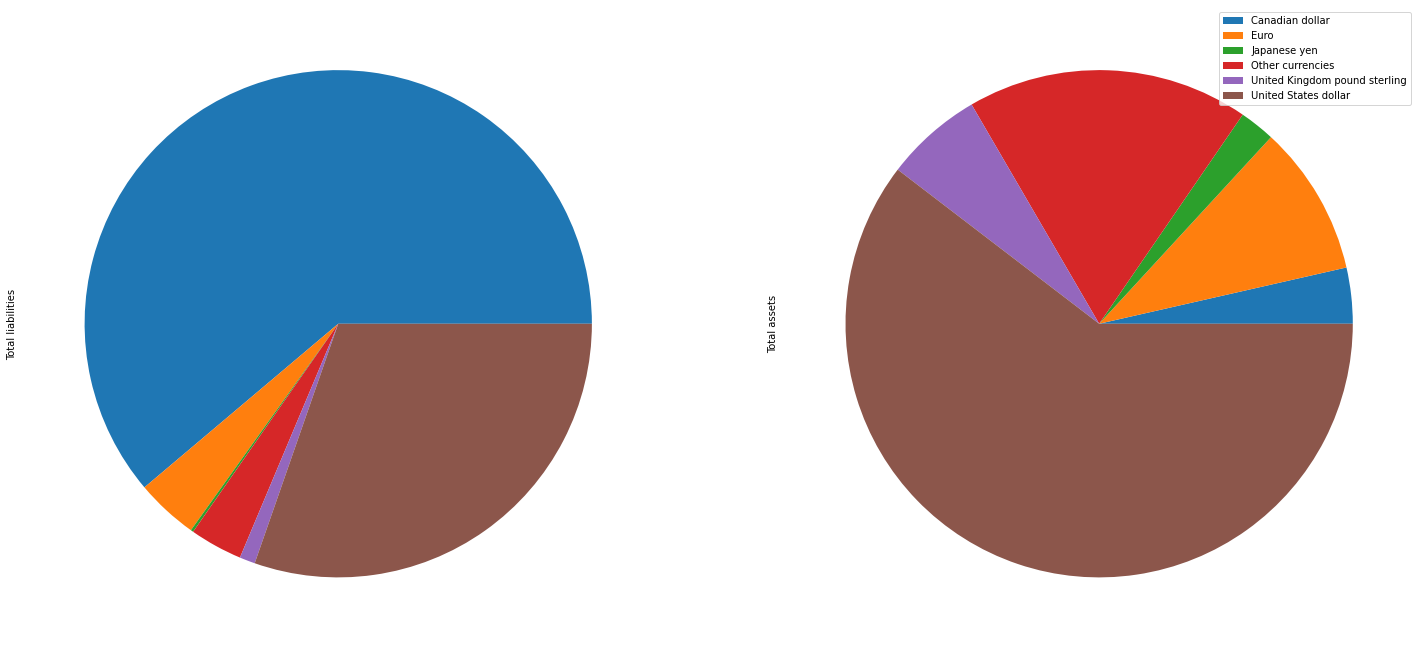

In [9]:
# Plot of Canada's average assets vs liabilities based on different currencies (including CAD)

total_plt_loc = (total_loc) & (df.currency != "All currencies")
total_ciip_df = df.loc[total_plt_loc].groupby(by=["ciip", "currency"]).mean().unstack("ciip")

plt.subplot(121)
total_ciip_df.iloc[:]["value"]["Total liabilities"].plot.pie(figsize=(25, 20), legend= False, labels=None)
plt.subplot(122)
total_ciip_df.iloc[:]["value"]["Total assets"].plot.pie(legend= True, labels=None);


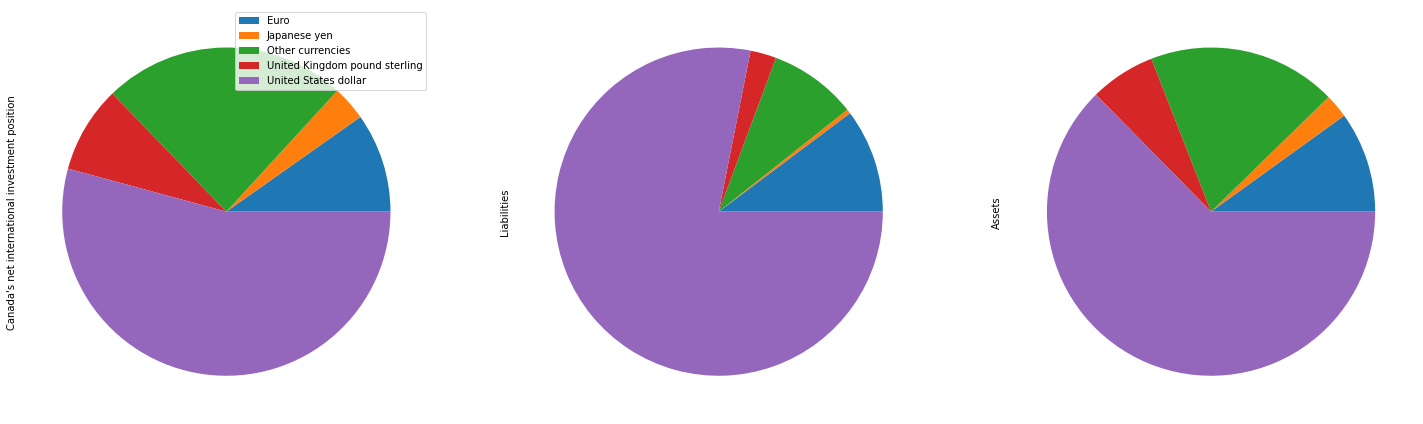

In [10]:
# Canada's average total assets/ liabilites and net IIP based on different currencies (not including CAD)

noncan_plt_loc = (total_loc) & (~ df.currency.isin(["All currencies", "Canadian dollar"]))
noncan_ciip_df = df.loc[noncan_plt_loc].groupby(by=["ciip", "currency"]).mean().unstack("ciip")

plt.subplot(131)
noncan_ciip_df.iloc[:]["value"]["Canada's net international investment position"].plot.pie(figsize=(20, 17), 
legend= True, labels=None);

plt.subplot(132)
noncan_ciip_df.iloc[:]["value"]["Total liabilities"].plot.pie(figsize=(25, 20), legend= False, labels=None, 
ylabel="Liabilities")

plt.subplot(133)
noncan_ciip_df.iloc[:]["value"]["Total assets"].plot.pie(legend= False, labels=None, ylabel="Assets");

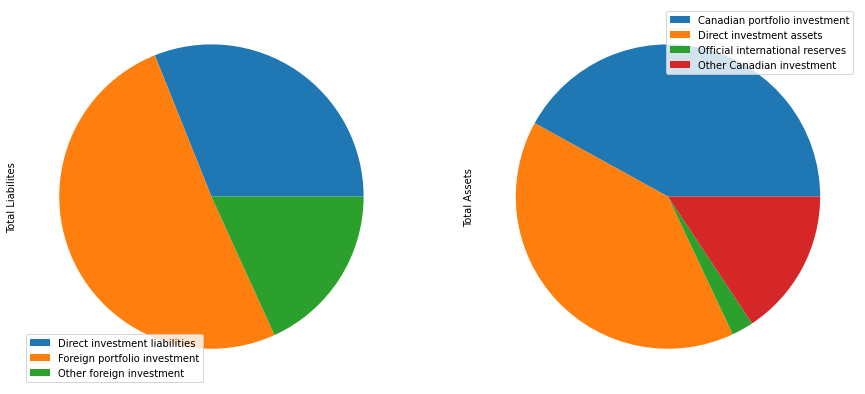

In [11]:
plt.subplot(121)
df.loc[(l1l_loc) & (df.currency == "All currencies")].groupby("ciip").mean().value.plot.pie(legend=True,
labels=None, figsize=(15, 7), ylabel="Total Liabilites")
plt.subplot(122)
df.loc[(l1a_loc) & (df.currency == "All currencies")].groupby("ciip").mean().value.plot.pie(legend=True,
labels=None, figsize=(15, 7), ylabel="Total Assets");

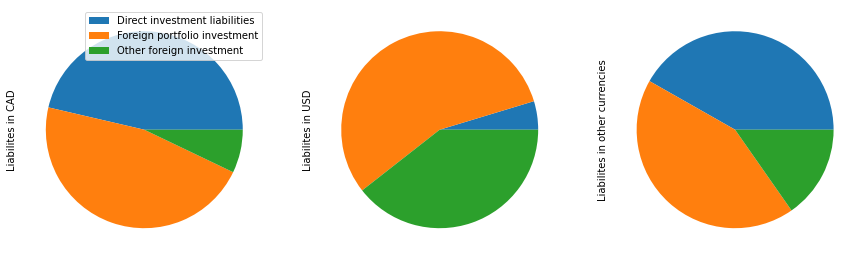

In [12]:
# Looking at the composition of the major liabilities and assets

noncadusd_cur_loc = ~df.currency.isin(["Canadian dollar", "United States dollar", "All currencies"])

plt.subplot(131)
df.loc[(l1l_loc) & (df.currency == "Canadian dollar")].groupby("ciip").mean().value.plot.pie(legend=True,
labels=None, figsize=(15, 7), ylabel="Liabilites in CAD")

plt.subplot(132)
df.loc[(l1l_loc) & (df.currency == "United States dollar")].groupby("ciip").mean().value.plot.pie(legend=False,
labels=None, figsize=(15, 7), ylabel="Liabilites in USD")

plt.subplot(133)
df.loc[(l1l_loc) & (noncadusd_cur_loc)].groupby("ciip").mean().value.plot.pie(legend=False,
labels=None, figsize=(15, 7), ylabel="Liabilites in other currencies");

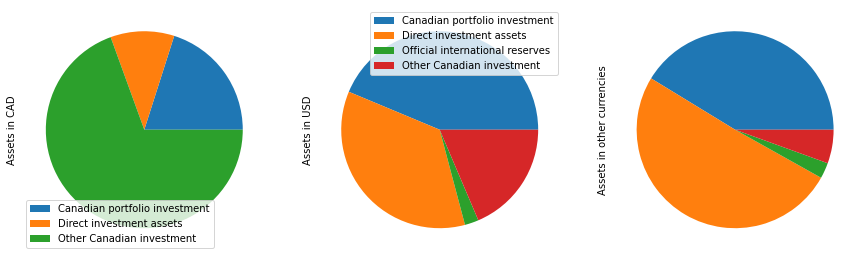

In [13]:
plt.subplot(131)
df.loc[(l1a_loc) & (df.currency == "Canadian dollar")].groupby("ciip").mean().value.plot.pie(legend=True,
labels=None, figsize=(15, 7), ylabel="Assets in CAD")

plt.subplot(132)
df.loc[(l1a_loc) & (df.currency == "United States dollar")].groupby("ciip").mean().value.plot.pie(legend=True,
labels=None, figsize=(15, 7), ylabel="Assets in USD");

plt.subplot(133)
df.loc[(l1a_loc) & (noncadusd_cur_loc)].groupby("ciip").mean().value.plot.pie(legend=False,
labels=None, figsize=(15, 7), ylabel="Assets in other currencies");
